<a href="https://colab.research.google.com/github/kaluznys/uczenie_maszynowe_UW/blob/main/praca_domowa2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: EM Clustering in 2D**
-------------------------------

You have seen how the **Expectation-Maximization (EM)** algorithm can fit a Gaussian Mixture Model (GMM) to a 2D dataset. You should now explore:

## **Primary Question**

**How can we visualize the *decision boundary* for attributing a *new* (unlabeled) point to one of the GMM clusters?**  

In other words, given a 2D data distribution modeled by EM, think of a way to clearly show (on a plot) *which* cluster a point would be assigned to (or which cluster has the highest responsibility (posterior probability) for that point)?  

The plot should comprehensively cover the entire visible region, ensuring that for any point on the plot, it is immediately evident which cluster it would belong to. You can plot **lines** separating clusters or use a **color map** showing each point's "most likely cluster".

You can illustrate your approach with **the same** 2D dataset that we used in class, or you can find another suitable 2D dataset, it's up to you. Note however, that having 3 clusters enhances the clarity of the visualization—while 2 clusters result in overly simple boundaries, using 4 or more clusters can make the entire plot difficult to interpret. Try to choose a dataset with 3 clusters.

Discuss any irregularities observed in the resulting plot. If a decision boundary suggests that a region should be attributed to a cluster in a counterintuitive way (we saw it in class!), provide an explanation for why this might occur. It may be also an indication you have a bug in your code.

## **Secondary Question**

**If we *didn't know* the number of clusters in advance, how could we decide on a suitable $K$ for the clustering algorithm?**  

You can illustrate your approach with **the same** dataset as in the primary question by trying different values of $K$ (and optionally plotting the evaluation metric values, e.g. silhouette scores, etc.). Or you can find another suitable dataset, it's up to you. Note, that the dataset doesn't need to be 2D in this task.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Clearly **answers** both the **primary** and **secondary** questions with appropriate plots and short explanations.
     - Uses Python code (e.g. `scikit-learn` for GMM) to visualize:
       1. The **data** and **cluster assignments**.
       2. The **decision boundary** (lines or a color map) indicating each cluster's region.
       3. A demonstration (chart or table) of how you would pick a suitable number of clusters $K$ when it is not known.
   - Remember to use the `$` symbol to delimit **inline equations** and `$$` to delimit **full-line equations**.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D
import pandas as pd

In [3]:
# generacja zbioru mause
np.random.seed(0)
# 1) 300 points from N([0, 0], [[0.16, 0],[0, 0.16]])
mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0],
                 [0.0,  0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

# 2) 100 points from N([0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# 3) 100 points from N([-0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

# labels (from which density point is generated)
y1 = [0]*300
y2=[1]*100
y3 = [2]*100
# Combine all data
data_X = np.vstack([data1, data2, data3])
y = y1+y2+y3
data_X=pd.DataFrame(data_X)
data_labeled= pd.DataFrame({'x' : data_X.iloc[:,0], 'y' : data_X.iloc[:,1], 'label' : y})
data_X.head(), data_labeled.head()

(          0         1
 0  0.705621  0.160063
 1  0.391495  0.896357
 2  0.747023 -0.390911
 3  0.380035 -0.060543
 4 -0.041288  0.164239,
           x         y  label
 0  0.705621  0.160063      0
 1  0.391495  0.896357      0
 2  0.747023 -0.390911      0
 3  0.380035 -0.060543      0
 4 -0.041288  0.164239      0)

Text(0.5, 1.0, 'Mouse set clusters by GMM model')

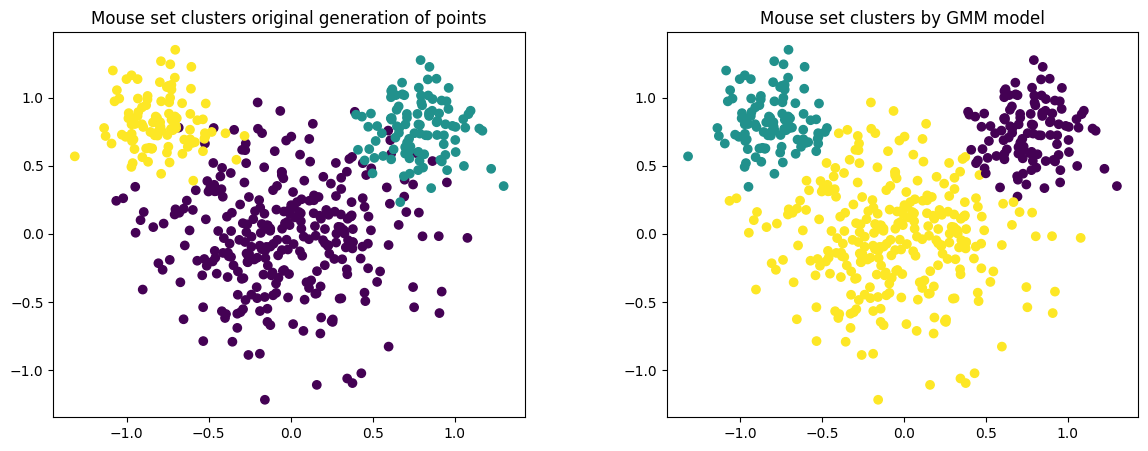

In [4]:
# Trenowanie modelu gmm i wizualizacja wyników dla tych punktów
gm_model =GaussianMixture(n_components=3, random_state=1).fit(data_X)
gm_labels = gm_model.predict(data_X)
gm_labels.shape
data_X = pd.DataFrame(data_X)
data_X.head()
plt.rcParams["figure.figsize"] = (14,5)
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1, 2, 1)
plt.scatter(data_labeled.iloc[:, 0], data_labeled.iloc[:, 1], c = y, cmap = 'viridis')
plt.title("Mouse set clusters original generation of points")
plt.subplot(1, 2, 2)
plt.scatter(data_X.iloc[:, 0], data_X.iloc[:, 1], c = gm_labels, cmap = 'viridis')
plt.title("Mouse set clusters by GMM model")

Text(0.5, 1.0, 'EM (GaussianMixture)')

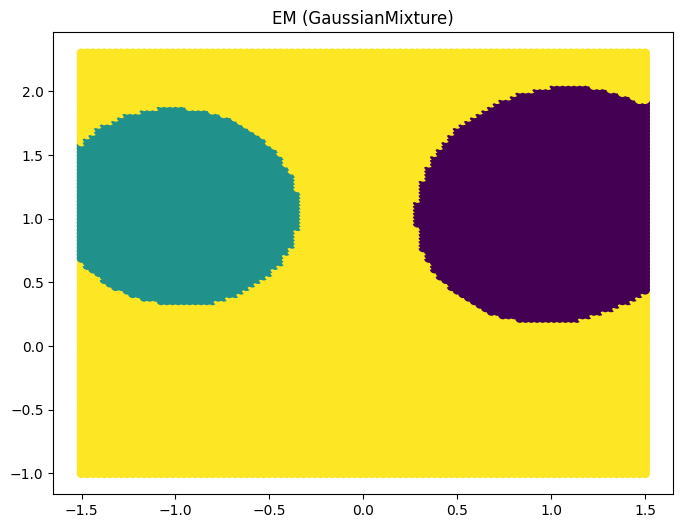

In [5]:
# wizualizacja granic między obszarami przynależności do poszczególnych rozkładów normalnych wg. wytrenowanego wcześniej modelu
plt.rcParams["figure.figsize"] = [8,6]
X= pd.DataFrame()
x_pt =np.linspace(-1.5,1.5,100)
y_pt= np.linspace(-1,2.3,120)
x_1, y_1 = np.meshgrid(x_pt, y_pt)
pairs = np.c_[x_1.ravel(), y_1.ravel()]
col = gm_model.predict(pairs)
plt.scatter(pairs[:, 0], pairs[:, 1], c=col, cmap='viridis')
plt.title("EM (GaussianMixture)")

Wytrenowany model GMM poprawnie zidentyfikował klastry w zbiorze "mouse". Dzięki porównaniu wykresów z zaznaczonymi punktami na kolor odpowiedni w zależności od przypisanego klastra przez model do wykresu, w którym kolor punktu świadczy o rozkładzie, z którego pochodzi, zauważamy, że klastry są podobne. Jedynie niewiele punktów, ze względu na losowość, zostało wygenerowanych nie przez najprawdopodobniejszy dla tego punktu rozkład i one zostały przez tę losowość źle przyporządkowane. Ponadto powyższy wykres ukazujący jak poszczególne punkty z pewnego obszaru na płaszczyźnie byłyby sklasyfikowane przez nasz model pokazuje, że z dobrym przybliżeniem określił on średnią i macierz kowariancji rozkładów. W szczególności widzimy, że rozrzut danych w klastrach z "uszów" jest mniejszy niż w pozostałym klastrze, co dobrze oddaje wartości w macierzy kowariancji, które są znacznie większe w klastrze przedstawiającym "twarz myszy". Obserwacja ta wynika stąd, że granica między klastrami  przebiega znacznie bliżej średniej z klastra "ucha" od średniej z klastra "twarz". Co więcej punkty z górnej części wykresu nieintuicyjnie zaznaczone są na żółto właśnie ze względu na większą wariancję w tym klastrze w kierunku ku górze. Rzeczywiście porównując wzory na gęstość wielowymiarowego rozkładu normalnego widzimy, że stosunek stałych normujących jest stały, podobnie jak stosunek macierzy kowariancji przemnożonej przez wersor w danym kierunku, natomiast kwadrat stosunku odległości od średniej z górnego i średniej z dolnego klastra zmniejsza się i dąży do 1 wraz z przesuwaniem punktu ku górze. Stąd prawdopodobieństwo przynależności punktu do dolnego klastra w pewnych momencie stanie się największe.     

Zadanie 2

In [6]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

Text(0.5, 1.0, 'original clusters')

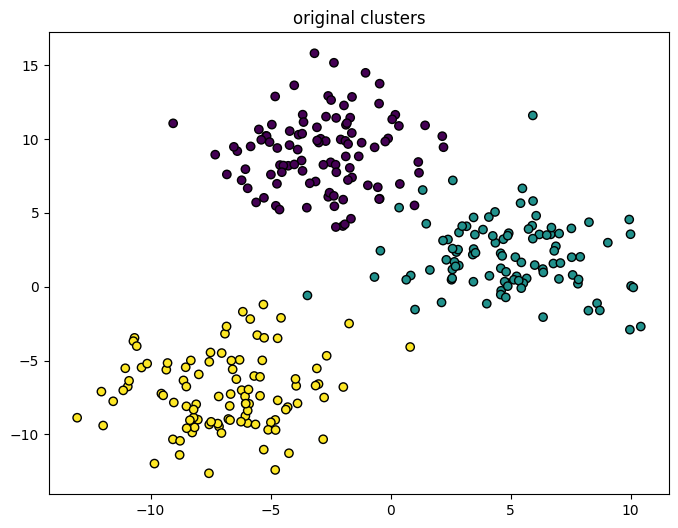

In [7]:
# generacja nowego zbioru
X, y = make_blobs(n_samples=300, centers=3, cluster_std=2.5, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title("original clusters")

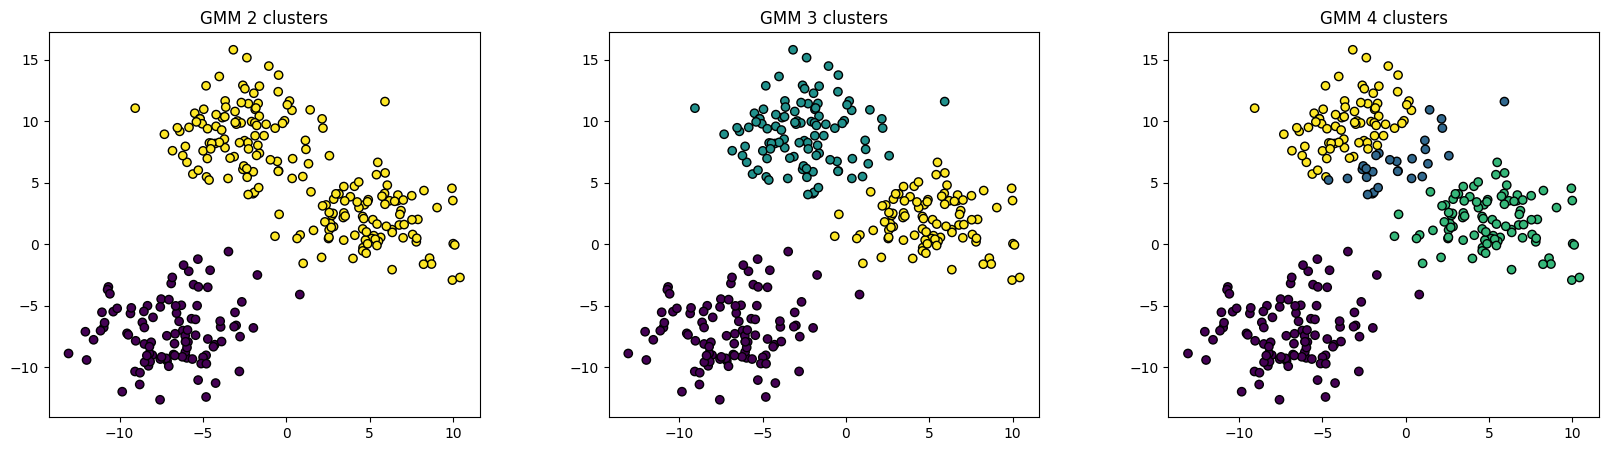

In [8]:
# klasteryzacja przy różnej liczbie klastrów metodą GaussianMixture
plt.rcParams["figure.figsize"] = (20,5)
plt.subplots_adjust(wspace = 0.3)
S = [0]*3
for i in range(2, 5):
  plt.subplot(1, 3, i-1)
  gm_mod = GaussianMixture(n_components=i, random_state=1).fit(X)
  y_new = gm_mod.predict(X)
  plt.scatter(X[:, 0], X[:, 1], c=y_new, cmap='viridis', edgecolors='k')
  plt.title(f"GMM {i} clusters")
  S[i-2] = silhouette_score(X, y_new)

Widzimy, że najlepsze przypisanie punktom kategorii występuje w przypadku 3 klastrów, ale sprawdzimy to metodami matematyki.

Text(0, 0.5, 'silhouette score')

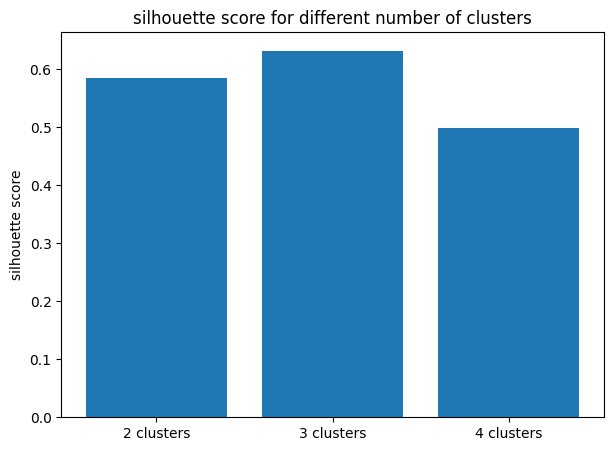

In [9]:
# Miara dla klasteryzacji
plt.rcParams["figure.figsize"] = (7,5)
plt.bar(["2 clusters","3 clusters", "4 clusters"], S)
plt.title("silhouette score for different number of clusters")
plt.ylabel("silhouette score")

Silhouette score zależy jednocześnie od skupienia danych wewnątrz klastra jak i odseparowania punktów z klasta od innych klastrów. Silhouette score policzony dla punktu bada w gruncie rzeczy stosunek średniej odległości od punktów z tego samego klastra do średniej odległości od punktów z sąsiedniego klastra. Jeżeli ta pierwsza wartość jest mała w porównaniu do drugiej to twierdzimy, że punkt jest dobrze przyporządkowany. Wzór na tę miarę dla punktu to: $s(i)=\frac{b(i)-a(i)}{max\{(a(i), b(i) \}}$, gdzie $a(i)$ i $b(i)$ to odpowiednio: średnia odległość od punktów z tegoż klastra i od punktów z sąsiedniego klastra. Wzór stanowi, że im większa wartość $s(i)$, tym lepsza klasyfikacja punktu. Ogólny Silhouette score to średnia tych miar dla wszystkich punktów. Powyższy wykres świadczy zatem, że najlepsza klasteryzacja występuje dla 3 klastrów.